In [1]:
%matplotlib inline

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import backend as K

import os
import shutil
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# Loading data

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# One-hot encoding

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Running the neural network

In [5]:
dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

Test loss: 0.0983617918588221
Test accuracy: 0.969


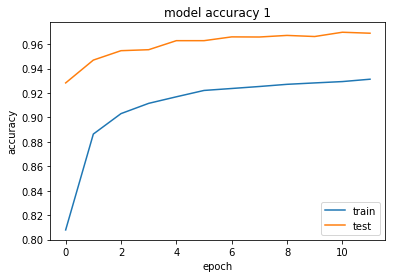

Test loss: 0.05800604267502204
Test accuracy: 0.9812


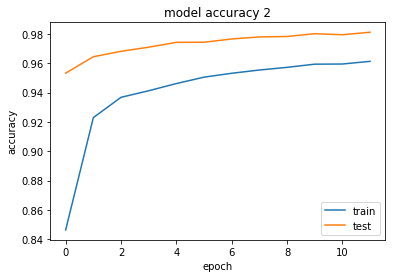

Test loss: 0.05189496781579219
Test accuracy: 0.9827


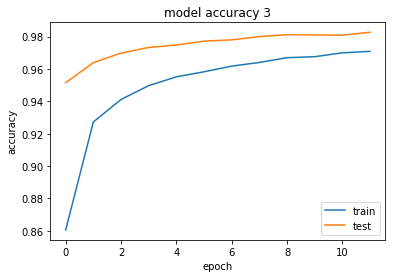

Test loss: 0.04862333169453777
Test accuracy: 0.9832


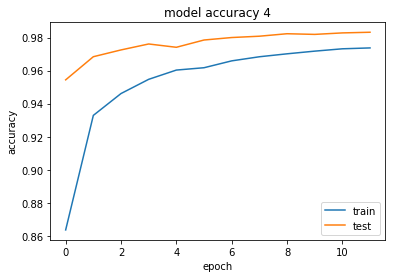

Test loss: 0.04102438693393488
Test accuracy: 0.9861


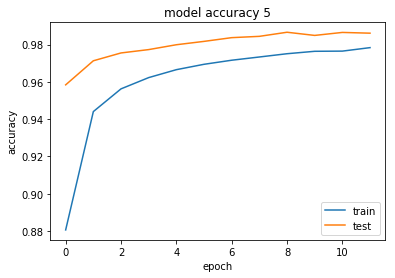

Test loss: 0.036163947606366126
Test accuracy: 0.9877


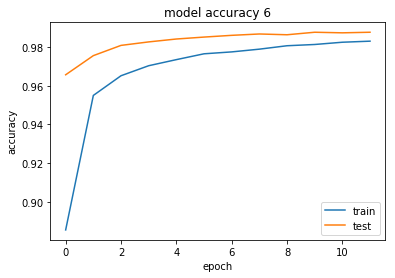

Test loss: 0.038686924884986366
Test accuracy: 0.9874


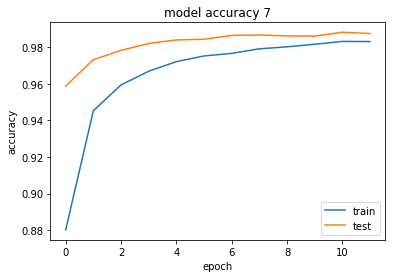

Test loss: 0.03464326785992889
Test accuracy: 0.9879


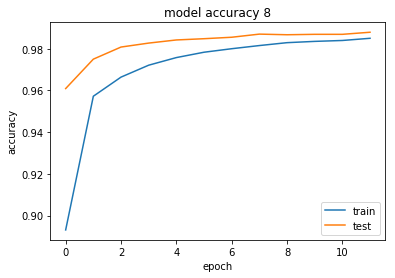

Test loss: 0.03564539235564007
Test accuracy: 0.9882


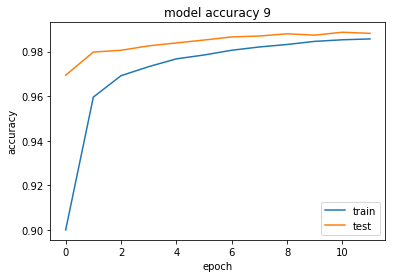

Test loss: 0.032180938176834026
Test accuracy: 0.9893


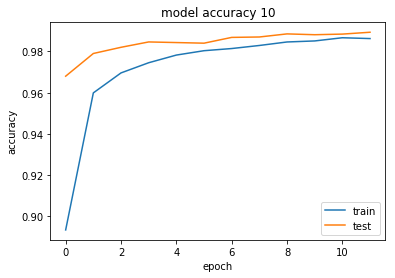

Test loss: 0.029754511679388817
Test accuracy: 0.9895


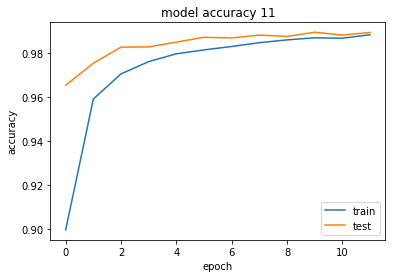

Test loss: 0.03338933836130891
Test accuracy: 0.9879


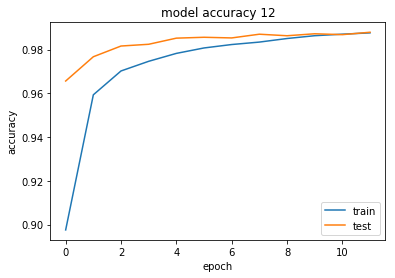

Test loss: 0.03371786946974171
Test accuracy: 0.988


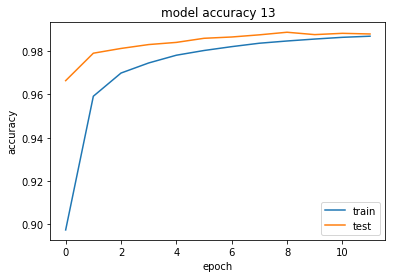

Test loss: 0.033357796615600815
Test accuracy: 0.9886


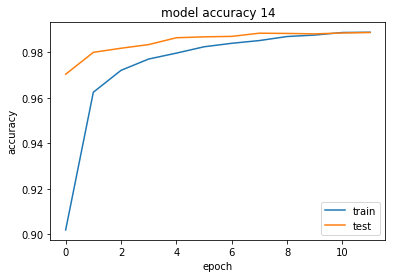

Test loss: 0.030968465872426167
Test accuracy: 0.9894


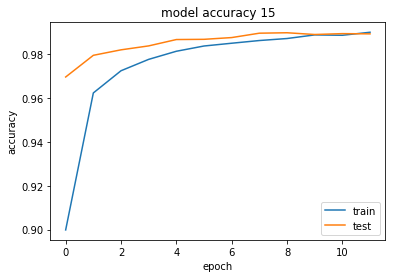

Test loss: 0.03203103214041621
Test accuracy: 0.9884


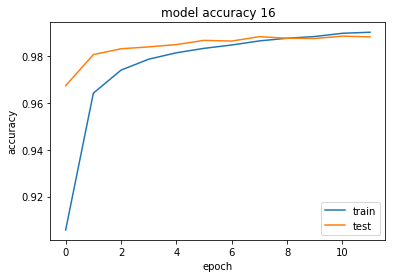

Test loss: 0.03273490778433625
Test accuracy: 0.9891


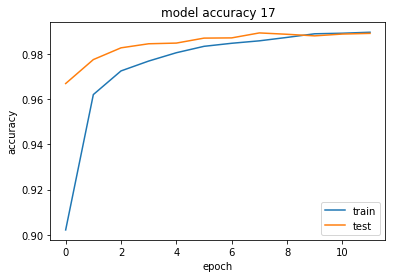

Test loss: 0.030130626171315088
Test accuracy: 0.9891


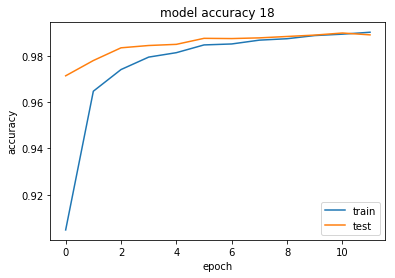

Test loss: 0.02885809612130106
Test accuracy: 0.9902


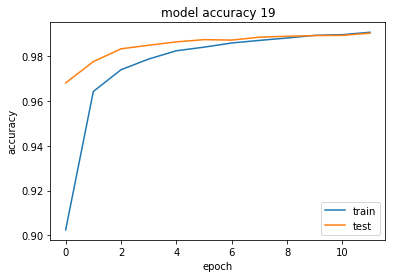

Test loss: 0.029364425445381495
Test accuracy: 0.9901


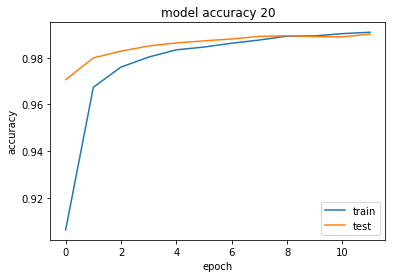

Test loss: 0.02838762862758158
Test accuracy: 0.9901


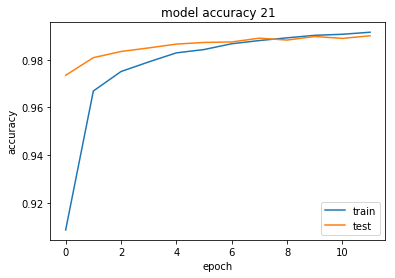

Test loss: 0.0315279261073214
Test accuracy: 0.9891


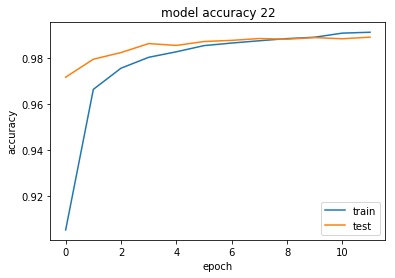

Test loss: 0.03308816812528821
Test accuracy: 0.9892


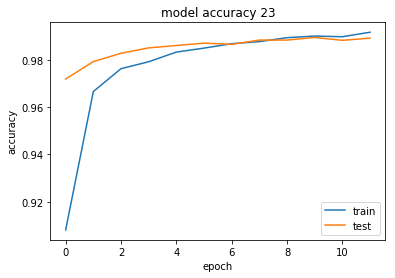

Test loss: 0.031579300030614106
Test accuracy: 0.99


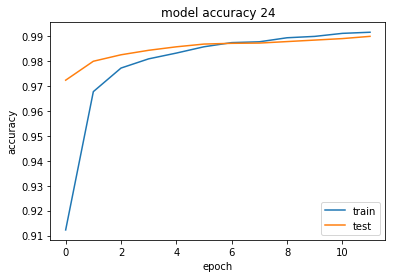

Test loss: 0.031155573162180372
Test accuracy: 0.989


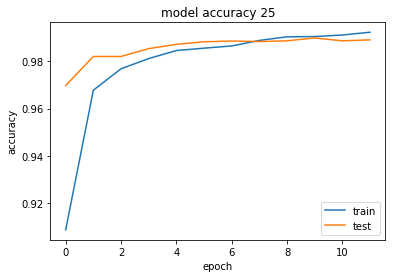

Test loss: 0.031625775110980615
Test accuracy: 0.9884


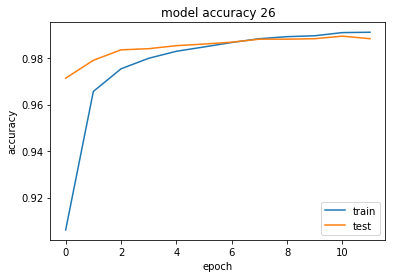

Test loss: 0.031412040866177264
Test accuracy: 0.9893


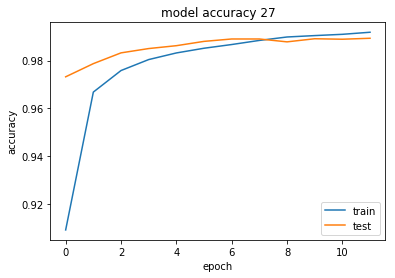

Test loss: 0.02999242141409559
Test accuracy: 0.9891


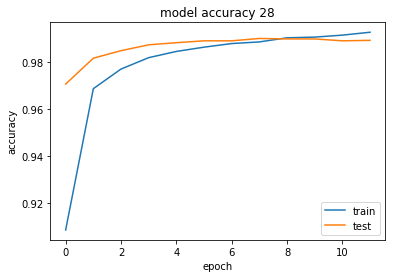

Test loss: 0.03054014525233215
Test accuracy: 0.9888


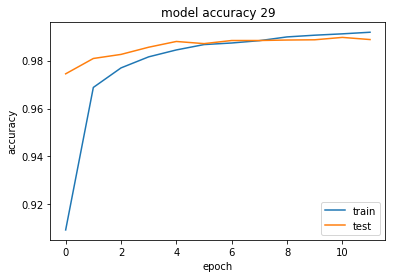

Test loss: 0.029746786179840275
Test accuracy: 0.9895


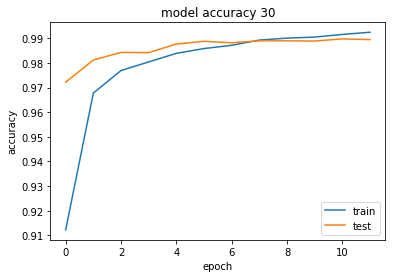

Test loss: 0.03007450650319006
Test accuracy: 0.9895


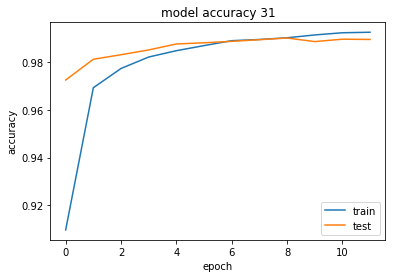

CPU times: user 37min 27s, sys: 2min 54s, total: 40min 21s
Wall time: 26min 19s


In [20]:
%%time

nodes = 512

for i in range(1, 32):

    model = Sequential()
    model.add(Conv2D(i, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(nodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                                verbose=0, 
                                                save_best_only=False,                                           
                                                save_weights_only=False,
                                                mode='auto',                                           
                                                period=1)
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        callbacks=[save_model_checkpoint],
                        validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy ' + str(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()